In [1]:
# Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error as mse

import math

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [69]:
# !pip3 install lightgbm

In [70]:
df_train = pd.read_csv(r'train.csv')
df_test = pd.read_csv(r'test.csv')
df_train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1112,1113,20,RL,73.0,7100,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,129900
1171,1172,20,RL,76.0,9120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,1400,11,2008,WD,Normal,163000
429,430,20,RL,130.0,11457,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,175000
355,356,20,RL,105.0,11249,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,177500
1378,1379,160,RM,21.0,1953,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,83000
1008,1009,20,RL,43.0,12118,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,240000
192,193,20,RL,68.0,9017,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,192000
106,107,30,RM,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,450,8,2007,WD,Normal,100000
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
1001,1002,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Abnorml,86000


In [71]:
df_test.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
842,2303,20,RL,71.0,9254,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal
716,2177,60,RL,41.0,10905,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal
1292,2753,20,RL,70.0,13300,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,Shed,400,6,2006,WD,Normal
1211,2672,120,RL,43.0,3087,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,New,Partial
1269,2730,20,RL,80.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,5,2006,WD,Normal
451,1912,20,RL,NaN,17597,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,GdPrv,NaN,0,7,2009,WD,Normal
239,1700,60,RL,79.0,9085,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
1098,2559,30,RL,54.0,7223,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2007,WD,Normal
1007,2468,45,RM,40.0,5680,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,9,2007,WD,AdjLand
990,2451,70,RM,60.0,3600,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,7,2007,WD,Partial


In [72]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

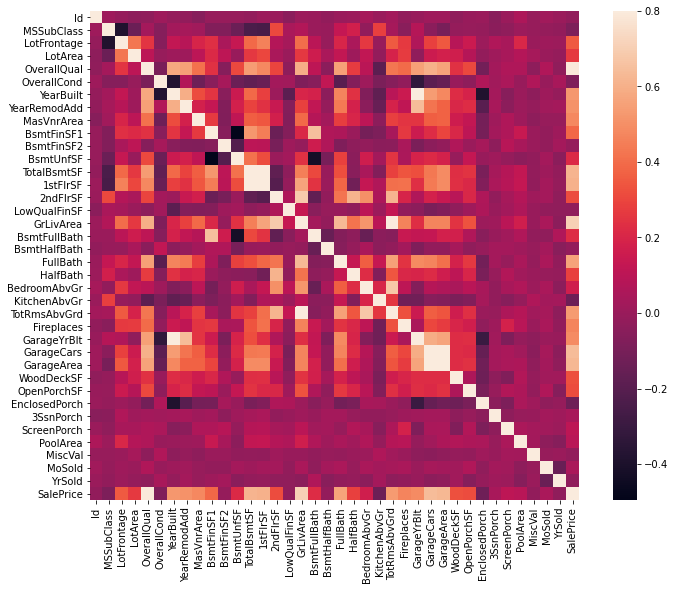

In [73]:
# Checking the Correlation between features
corr = df_train.corr('pearson')
ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=0.8, square=True)

In [74]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [75]:
numeric_features = ['TotalBsmtSF','1stFlrSF','GrLivArea','GarageYrBlt']
categ_features = ['FullBath', 'TotRmsAbvGrd','OverallQual','GarageCars','Fireplaces']

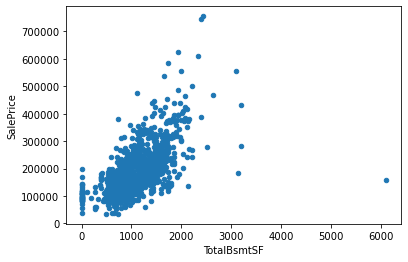

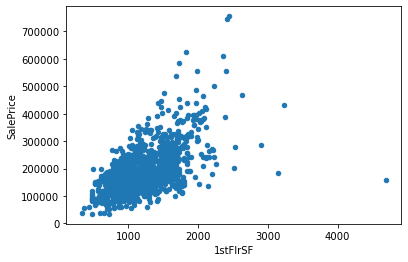

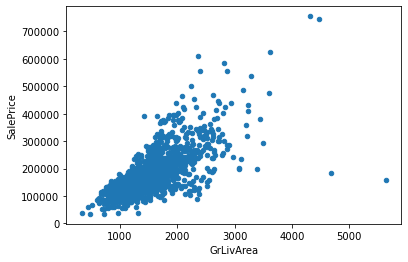

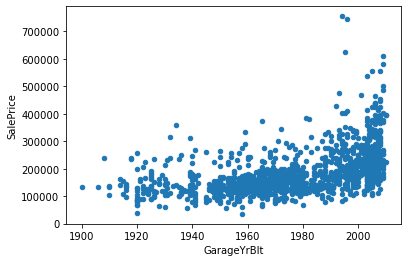

In [76]:
for feature in numeric_features:
    df_train.plot(kind='scatter',x = feature, y = 'SalePrice')

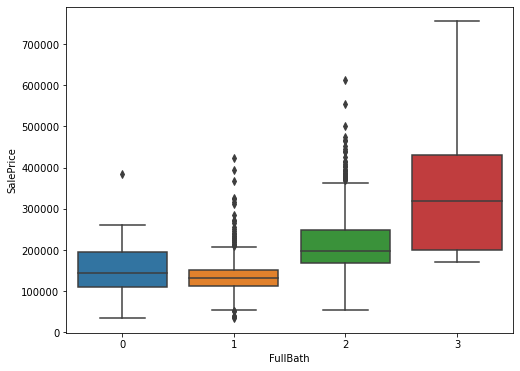

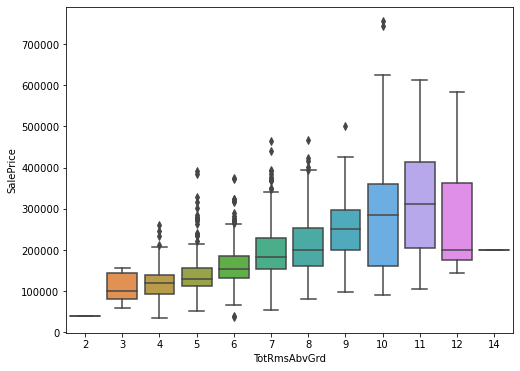

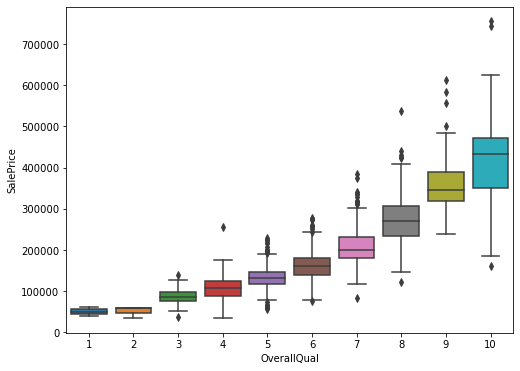

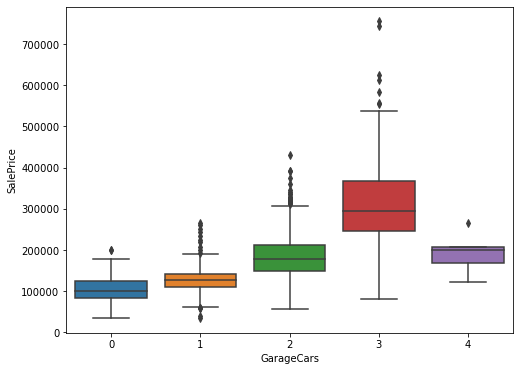

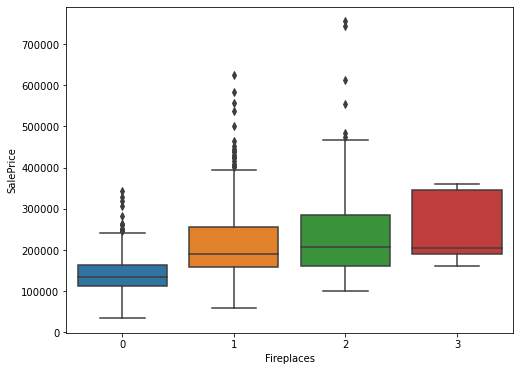

In [77]:
for feature in categ_features:
    ax = plt.subplots(figsize=(8, 6))
    sns.boxplot(x = feature, y = 'SalePrice', data=df_train)

From the above visualizations it is clear that the is strong corrletion between the SalePrice and above Viz'd features.

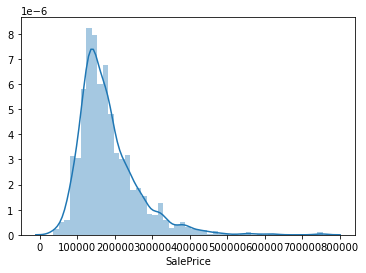

In [78]:
sns.distplot(df_train['SalePrice'])

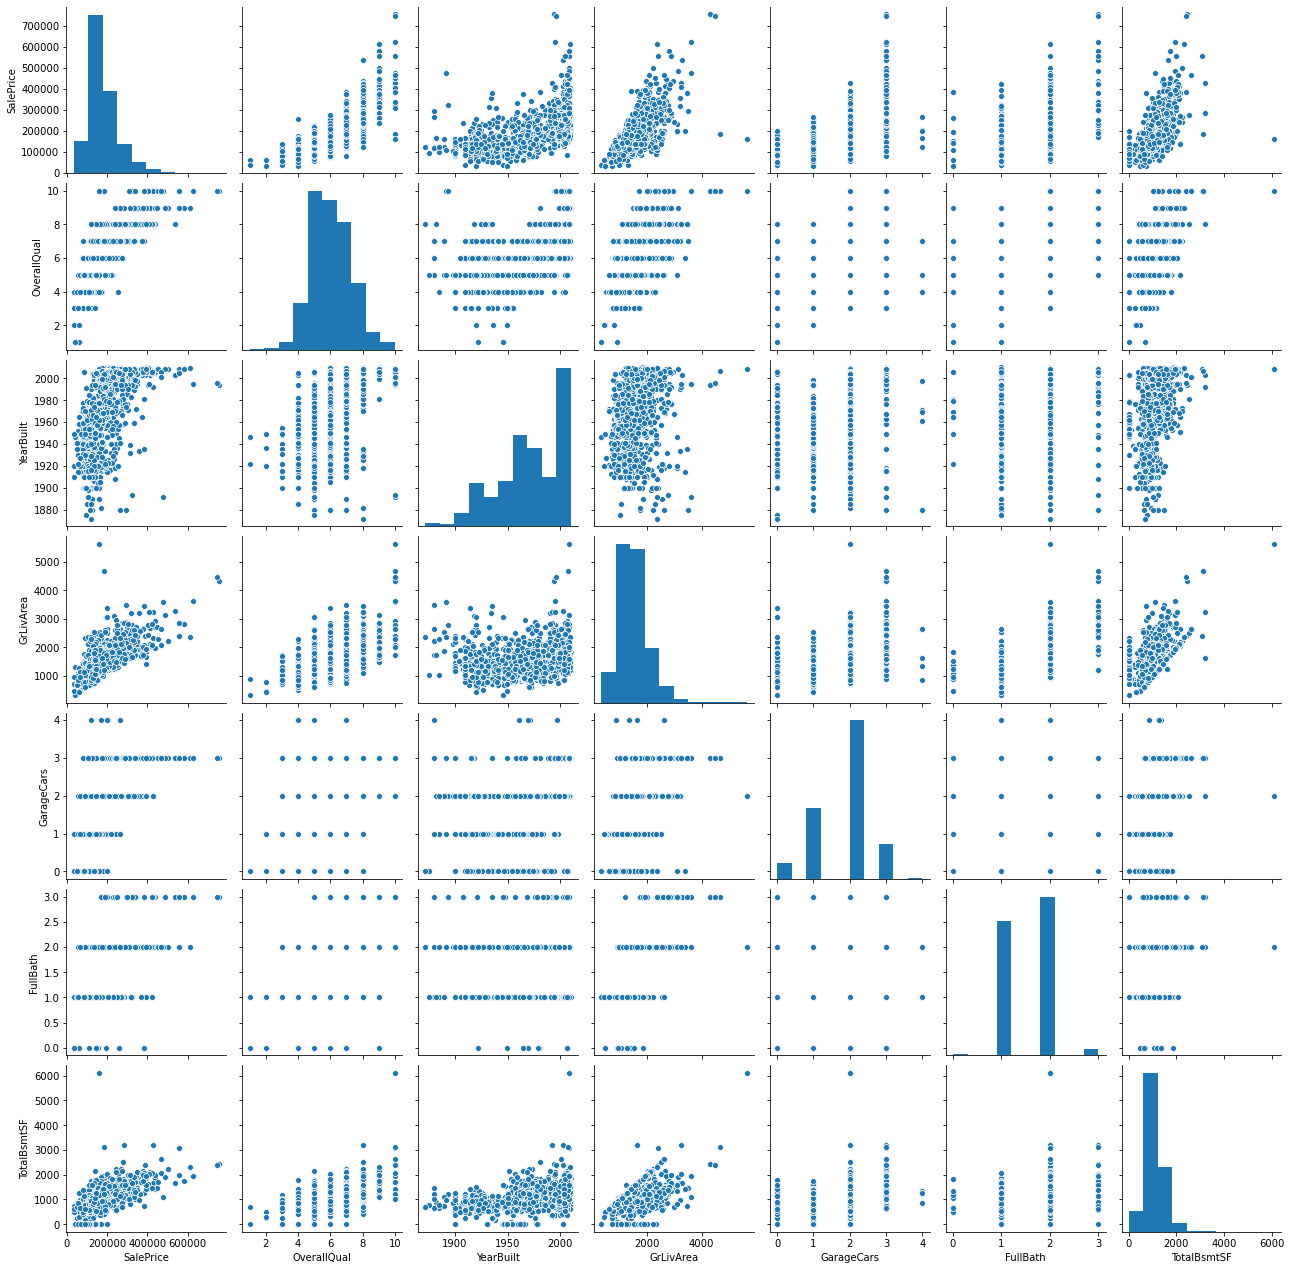

In [79]:
# Scatter Plots
cols = ['SalePrice', 'OverallQual', 'YearBuilt', 'GrLivArea', 'GarageCars', 'FullBath','TotalBsmtSF']
sns.pairplot(df_train[cols])

In [80]:
# Missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.DataFrame({'Total': total, 'Percent': percent})
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [81]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, axis = 1)

In [82]:
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

### Finding Outliars

In [83]:
SalePrice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range = SalePrice_scaled[SalePrice_scaled[:,0].argsort()][:10]
high_range = SalePrice_scaled[SalePrice_scaled[:,0].argsort()][-10:]
print('lower range of the distribution:')
print(low_range)
print('higher ranger of the distribution:')
print(high_range)

lower range of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
higher ranger of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


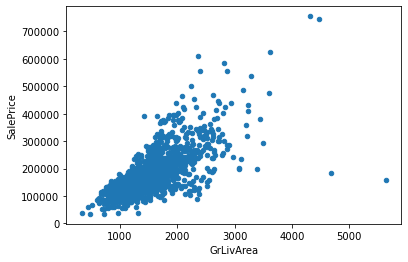

In [84]:
df_train.plot.scatter(x = 'GrLivArea', y = 'SalePrice')

The  two points on the extreme right on the curve does not seem right as the GrLivArea is high but the Sale Price is quite low. They seems like to outliers which can affect out model. So delete them from the dataset.

In [85]:
df_train.sort_values(by = 'GrLivArea', ascending = False)['GrLivArea']

1298    5642
523     4676
1182    4476
691     4316
1169    3627
        ... 
528      605
29       520
916      480
1100     438
533      334
Name: GrLivArea, Length: 1459, dtype: int64

In [87]:
df_train = df_train.drop(df_train[df_train.Id == 1299].index, axis = 0)
df_train = df_train.drop(df_train[df_train.Id == 524].index, axis = 0)

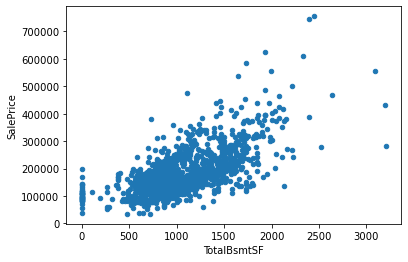

In [89]:
df_train.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice')

In [67]:
df_train.head()

""
0
1
2
3
4


In [7]:
[# Concat train and test data
df_train['train']= 1
df_test['train'] = 0
df = pd.concat([df_train, df_test], axis = 0, sort = False)
df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
427,1888,20,RL,85.0,10200,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2009,WD,Normal,NaN,0
1235,1236,70,RL,96.0,13132,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,WD,Normal,138887.0,1
356,357,20,RL,NaN,9248,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2009,WD,Normal,173000.0,1
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000.0,1
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,NaN,NaN,NaN,0,12,2006,WD,Normal,280000.0,1
21,1482,120,RL,41.0,7132,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,NaN,0
1224,2685,60,RL,NaN,12585,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2006,WD,Normal,NaN,0
415,416,20,RL,73.0,8899,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,New,Partial,181134.0,1
1213,1214,80,RL,NaN,10246,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2006,WD,Normal,145000.0,1
495,1956,60,RL,NaN,12511,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,12,2008,WD,Normal,NaN,0


In [8]:
{df.columns[x]:df.isnull().sum().tolist()[x] for x in range(len(df.columns))}

{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 4,
 'LotFrontage': 486,
 'LotArea': 0,
 'Street': 0,
 'Alley': 2721,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 2,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'MasVnrType': 24,
 'MasVnrArea': 23,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 81,
 'BsmtCond': 82,
 'BsmtExposure': 82,
 'BsmtFinType1': 79,
 'BsmtFinSF1': 1,
 'BsmtFinType2': 80,
 'BsmtFinSF2': 1,
 'BsmtUnfSF': 1,
 'TotalBsmtSF': 1,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 1,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 1,
 'TotRmsAbvGrd': 0,
 'Functional': 2,
 'F

In [9]:
# Drop columns which has most rows nan, i.e. Drop Alley, PoolQC, Fence,MiscFeature
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True, axis=1)

In [10]:
# Splitting the data into numerical and categorical 
df_numerical = df.select_dtypes(exclude=['object'])
df_categorical = df.select_dtypes(include=['object'])

In [11]:
print('Numerical variables \n', df_numerical.dtypes)
print('-'*50, '\n', 'Categorical variables \n', df_categorical.dtypes)

Numerical variables 
 Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
train              int64
dty

In [12]:
df_categorical.isnull().sum()

MSZoning            4
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
SaleType            1
SaleCondition       0
dtype: int64

In [13]:
# Fill NaN with None as per description given
col_none = ['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2','FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df_categorical[col_none] = df_categorical[col_none].fillna('None')

In [14]:
# Filling rest of the missing values with Mode of the Column
col_missing = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical','KitchenQual','Functional','SaleType']
df_categorical[col_missing] = df_categorical[col_missing].fillna(df_categorical[col_missing].mode().iloc[0])
df_categorical.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [15]:
df_numerical.isnull().sum()

Id                  0
MSSubClass          0
LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
train               0
dtype: int64

In [16]:
# Filling missing LotFrontage with median values
df_numerical['LotFrontage'] = df_numerical['LotFrontage'].fillna(df_numerical['LotFrontage'].median())

In [17]:
df_numerical[['GarageYrBlt','YearBuilt']]

,GarageYrBlt,YearBuilt
0,2003.0,2003
1,1976.0,1976
2,2001.0,2001
3,1998.0,1915
4,2000.0,2000
...,...,...
1454,NaN,1970
1455,1970.0,1970
1456,1960.0,1960
1457,NaN,1992


In [18]:
(df_numerical['YearBuilt'] - df_numerical['GarageYrBlt'] > 0).value_counts()

False    2901
True       18
dtype: int64

In [19]:
# It is obsereved that GarageYrBlt is same as House YrBuilt for most cases, so replacing with corresponding Year Built values
df_numerical['GarageYrBlt'] = df_numerical['GarageYrBlt'].fillna(df_numerical['YearBuilt'])

In [20]:
df_numerical.isnull().sum()

Id                  0
MSSubClass          0
LotFrontage         0
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt         0
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
train               0
dtype: int64

In [21]:
# fill rest of missing values with median
df_numerical = df_numerical.fillna(df_numerical.median())

In [22]:
df_numerical.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
train            0
dtype: int64

In [23]:
df_categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [24]:
df_categorical.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,...,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919
unique,5,2,4,4,2,5,3,25,9,8,...,4,7,6,7,4,6,6,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
freq,2269,2907,1859,2622,2918,2133,2778,443,2511,2889,...,1493,2719,1420,1723,1230,2604,2654,2641,2526,2402


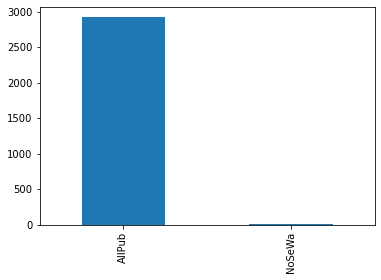

In [25]:
df_categorical['Utilities'].value_counts().plot(kind='bar')

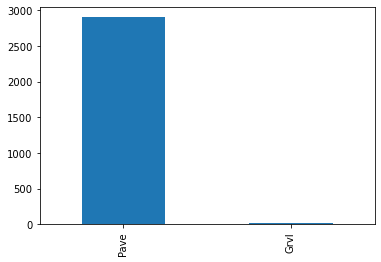

In [26]:
df_categorical['Street'].value_counts().plot(kind='bar')

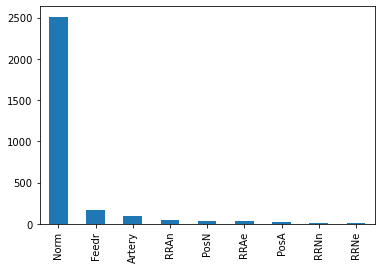

In [27]:
df_categorical['Condition1'].value_counts().plot(kind='bar')

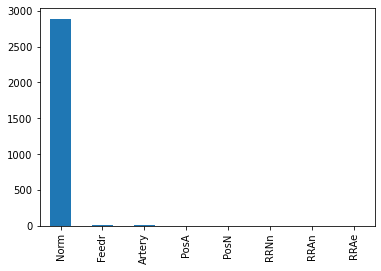

In [28]:
df_categorical['Condition2'].value_counts().plot(kind='bar')

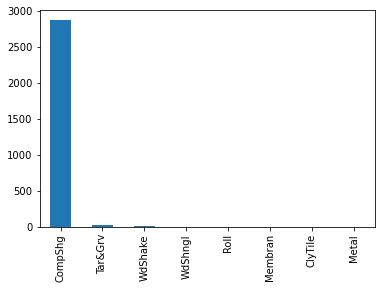

In [29]:
df_categorical['RoofMatl'].value_counts().plot(kind='bar')

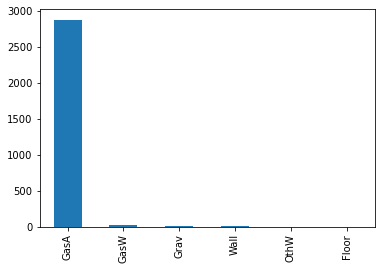

In [30]:
df_categorical['Heating'].value_counts().plot(kind='bar')

In [31]:
# Variance of the some visualized categorical varibles seems to less, so drop these features
df_categorical.drop(['Heating', 'Condition2', 'Street', 'Utilities','RoofMatl'], axis = 1, inplace =True)

# Learning Feature Engineering

In [32]:
df_numerical['AgeHouse'] = df_numerical['YrSold'] - df_numerical['YearBuilt']
df_numerical['AgeHouse'].describe()

count    2919.000000
mean       36.479959
std        30.336182
min        -1.000000
25%         7.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: AgeHouse, dtype: float64

In [33]:
df_numerical[df_numerical['AgeHouse'] < 0]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train,AgeHouse
1089,2550,20,128.0,39290,10,5,2008,2009,1224.0,4010.0,...,0,0,0,0,17000,10,2007,163000.0,0,-1


In [34]:
# We change the YrSold to 2009 because YearRemodAdd is in 2009, so it is strange for YrSold to be in 2009
df_numerical.loc[(df_numerical.AgeHouse < 0), ['YrSold']] = 2009 
df_numerical['AgeHouse'] = df_numerical['YrSold'] - df_numerical['YearBuilt']
df_numerical['AgeHouse'].describe()

count    2919.000000
mean       36.480644
std        30.335358
min         0.000000
25%         7.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: AgeHouse, dtype: float64

In [35]:
df_numerical['TotalBsmtBath'] = df_numerical['BsmtFullBath'] + df_numerical['BsmtHalfBath']*0.5
df_numerical['TotalBath'] = df_numerical['FullBath'] + df_numerical['HalfBath']*0.5
df_numerical['TotalSF'] = df_numerical['TotalBsmtSF'] + df_numerical['1stFlrSF'] + df_numerical['2ndFlrSF']

In [36]:
df_numerical.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train,AgeHouse,TotalBsmtBath,TotalBath,TotalSF
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,2,2008,208500.0,1,5,1.0,2.5,2566.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,5,2007,181500.0,1,31,0.5,2.0,2524.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,9,2008,223500.0,1,7,1.0,2.5,2706.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,2,2006,140000.0,1,91,1.0,1.0,2473.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,12,2008,250000.0,1,8,1.0,2.5,3343.0


In [37]:
df_numerical.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
train            0
AgeHouse         0
TotalBsmtBath    0
TotalBath        0
TotalSF          0
dtype: int64

In [38]:
df_categorical.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [39]:
# Mapping the Ordinal Features from categorical data
bin_map  = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0,'Av':3,'Mn':2,'No':1,'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,
            'Unf':1,'Y':3,'P':2,'N':1,'Reg':4,'IR1':3,'IR2':2,'IR3':1}
            
map_columns = ['ExterQual','ExterCond','BsmtCond','BsmtQual','HeatingQC','KitchenQual','FireplaceQu','GarageQual',
              'GarageCond','PavedDrive','LotShape','BsmtFinType1','BsmtFinType2']

for map_column in map_columns:
    df_categorical[map_column] = df_categorical[map_column].map(bin_map)
            

In [40]:
df_categorical.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,4,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,4,Typ,0,Attchd,RFn,3,3,3,WD,Normal
1,RL,4,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,...,3,Typ,3,Attchd,RFn,3,3,3,WD,Normal
2,RL,3,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,4,Typ,3,Attchd,RFn,3,3,3,WD,Normal
3,RL,3,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,...,4,Typ,4,Detchd,Unf,3,3,3,WD,Abnorml
4,RL,3,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,...,4,Typ,3,Attchd,RFn,3,3,3,WD,Normal


In [41]:
# Converting Categorical Values into numerical variables
objList = df_categorical.select_dtypes(include="object").columns
# print(objList)
le = LabelEncoder()
for feature in objList:
    df_categorical[feature] = le.fit_transform(df_categorical[feature].astype(str))
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       2919 non-null   int32
 1   LotShape       2919 non-null   int64
 2   LandContour    2919 non-null   int32
 3   LotConfig      2919 non-null   int32
 4   LandSlope      2919 non-null   int32
 5   Neighborhood   2919 non-null   int32
 6   Condition1     2919 non-null   int32
 7   BldgType       2919 non-null   int32
 8   HouseStyle     2919 non-null   int32
 9   RoofStyle      2919 non-null   int32
 10  Exterior1st    2919 non-null   int32
 11  Exterior2nd    2919 non-null   int32
 12  MasVnrType     2919 non-null   int32
 13  ExterQual      2919 non-null   int64
 14  ExterCond      2919 non-null   int64
 15  Foundation     2919 non-null   int32
 16  BsmtQual       2919 non-null   int64
 17  BsmtCond       2919 non-null   int64
 18  BsmtExposure   2919 non-null   int32
 19  BsmtFi

In [42]:
df_categorical.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,4,3,4,0,5,2,0,5,1,...,4,6,0,1,2,3,3,3,8,4
1,3,4,3,2,0,24,1,0,2,1,...,3,6,3,1,2,3,3,3,8,4
2,3,3,3,4,0,5,2,0,5,1,...,4,6,3,1,2,3,3,3,8,4
3,3,3,3,0,0,6,2,0,5,1,...,4,6,4,5,3,3,3,3,8,0
4,3,3,3,2,0,15,2,0,5,1,...,4,6,3,1,2,3,3,3,8,4


In [43]:
df_final = pd.concat([df_categorical,df_numerical], axis=1, sort=False)
df_final.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train,AgeHouse,TotalBsmtBath,TotalBath,TotalSF
0,3,4,3,4,0,5,2,0,5,1,...,0,0,2,2008,208500.0,1,5,1.0,2.5,2566.0
1,3,4,3,2,0,24,1,0,2,1,...,0,0,5,2007,181500.0,1,31,0.5,2.0,2524.0
2,3,3,3,4,0,5,2,0,5,1,...,0,0,9,2008,223500.0,1,7,1.0,2.5,2706.0
3,3,3,3,0,0,6,2,0,5,1,...,0,0,2,2006,140000.0,1,91,1.0,1.0,2473.0
4,3,3,3,2,0,15,2,0,5,1,...,0,0,12,2008,250000.0,1,8,1.0,2.5,3343.0


In [44]:
df_final.drop(['Id'], axis=1, inplace=True)

df_train_final = df_final[df_final['train'] == 1]
df_test_final = df_final[df_final['train'] == 0]

In [45]:
df_train_final.drop(['train'], axis=1, inplace=True)
df_test_final.drop(['train'], axis=1, inplace=True)
df_test_final.drop(['SalePrice'], axis=1, inplace=True)

In [46]:
df_train_final.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,AgeHouse,TotalBsmtBath,TotalBath,TotalSF
0,3,4,3,4,0,5,2,0,5,1,...,0,0,0,2,2008,208500.0,5,1.0,2.5,2566.0
1,3,4,3,2,0,24,1,0,2,1,...,0,0,0,5,2007,181500.0,31,0.5,2.0,2524.0
2,3,3,3,4,0,5,2,0,5,1,...,0,0,0,9,2008,223500.0,7,1.0,2.5,2706.0
3,3,3,3,0,0,6,2,0,5,1,...,0,0,0,2,2006,140000.0,91,1.0,1.0,2473.0
4,3,3,3,2,0,15,2,0,5,1,...,0,0,0,12,2008,250000.0,8,1.0,2.5,3343.0


In [47]:
df_test_final.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,AgeHouse,TotalBsmtBath,TotalBath,TotalSF
0,2,4,3,4,0,12,1,0,2,1,...,0,120,0,0,6,2010,49,0.0,1.0,1778.0
1,3,3,3,0,0,12,2,0,2,3,...,0,0,0,12500,6,2010,52,0.0,1.5,2658.0
2,3,3,3,4,0,8,2,0,5,1,...,0,0,0,0,3,2010,13,0.0,2.5,2557.0
3,3,3,3,4,0,8,2,0,5,1,...,0,0,0,0,6,2010,12,0.0,2.5,2530.0
4,3,3,1,4,0,22,2,4,2,1,...,0,144,0,0,1,2010,18,0.0,2.0,2560.0


In [90]:
# # Keeping only keeping features with correlation value above 0.4
# corr_SalePrice = {corr.columns[col]:corr.iloc[len(corr)-1][col] for col in range(len(corr.columns))}
# no_corr_dict ={}
# for key, value in corr_SalePrice.items():
#     if (value < .4 and value > -.4):
#         no_corr_dict[key] = value
# # correlated_dict
# len(no_corr_dict.keys())

In [91]:
# # Dropping all the columns with pearson correlation less than 0.4 from SalePrice
# df_train.drop(no_corr_dict.keys(), axis = 1, inplace =True)

In [92]:
X = df_train_final.drop(['SalePrice'],axis=1).values
y = df_train_final['SalePrice'].values
print(X[:2], y[:2])

[[3.000e+00 4.000e+00 3.000e+00 4.000e+00 0.000e+00 5.000e+00 2.000e+00
  0.000e+00 5.000e+00 1.000e+00 1.200e+01 1.300e+01 1.000e+00 4.000e+00
  3.000e+00 2.000e+00 4.000e+00 3.000e+00 3.000e+00 6.000e+00 1.000e+00
  5.000e+00 1.000e+00 4.000e+00 4.000e+00 6.000e+00 0.000e+00 1.000e+00
  2.000e+00 3.000e+00 3.000e+00 3.000e+00 8.000e+00 4.000e+00 6.000e+01
  6.500e+01 8.450e+03 7.000e+00 5.000e+00 2.003e+03 2.003e+03 1.960e+02
  7.060e+02 0.000e+00 1.500e+02 8.560e+02 8.560e+02 8.540e+02 0.000e+00
  1.710e+03 1.000e+00 0.000e+00 2.000e+00 1.000e+00 3.000e+00 1.000e+00
  8.000e+00 0.000e+00 2.003e+03 2.000e+00 5.480e+02 0.000e+00 6.100e+01
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.000e+00 2.008e+03
  5.000e+00 1.000e+00 2.500e+00 2.566e+03]
 [3.000e+00 4.000e+00 3.000e+00 2.000e+00 0.000e+00 2.400e+01 1.000e+00
  0.000e+00 2.000e+00 1.000e+00 8.000e+00 8.000e+00 2.000e+00 3.000e+00
  3.000e+00 1.000e+00 4.000e+00 3.000e+00 1.000e+00 5.000e+00 1.000e+00
  5.000e+00 1.000e+00

In [93]:
# Splitting the data into train-test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=4)
print(len(X_train),len(y_test))

1168 292


Modelling the Dataset

In [107]:
xgbr = XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, n_estimators=2400,
             n_jobs=1, nthread=None, objective='reg:linear',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)

In [108]:
xgbr.fit(X_train,y_train)

[11:04:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[11:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=4,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=2400, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0.6,
             reg_lambda=0.6, scale_pos_weight=1, silent=None, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [119]:
xgbr_predict = xgbr.predict(X_test)
print('RMSE using xgbRegressor: %.2f' % math.sqrt(mse(y_test, xgbr_predict)))

RMSE using xgbRegressor: 21489.56


In [120]:
lgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=12000, 
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.4, 
                                       )

In [121]:
lgbm.fit(X_train,y_train, eval_metric='rmse')

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
              feature_fraction=0.4, learning_rate=0.01, max_bin=200,
              n_estimators=12000, num_leaves=4, objective='regression')

In [122]:
lgbm_predict = lgbm.predict(X_test)
print('RMSE using lgbmRegressor: %.2f' % math.sqrt(mse(y_test, lgbm_predict)))

RMSE using lgbmRegressor: 23720.62


## Preparing for Submission

In [123]:
xgbr.fit(X,y)

[12:21:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:21:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=4,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=2400, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0.6,
             reg_lambda=0.6, scale_pos_weight=1, silent=None, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [125]:
xgbr_predict_ = xgbr.predict(df_test_final.values)

In [126]:
xgbr_predict_[:5]

array([125638.64, 164761.4 , 184823.22, 196701.28, 181957.72],
      dtype=float32)

In [127]:
submission = pd.DataFrame({"Id" : df_test['Id'], 'SalePrice': xgbr_predict_})

In [128]:
submission.head()

,Id,SalePrice
0,1461,125638.640625
1,1462,164761.406250
2,1463,184823.218750
3,1464,196701.281250
4,1465,181957.718750


In [129]:
submission.to_csv('submission.csv', index=False)